**Aim :- Deploying Generative Adversarial Network (GAN) for Generating Fake data.**

In [1]:
# Importing Libraries

import torch
from torch import nn
import math
import matplotlib.pyplot as plt


In [2]:
# Preparing training_data

train_data_length = 1024
train_data = torch.zeros((train_data_length,2))
train_data[:,0] = 2*math.pi*torch.rand(train_data_length)
train_data[:,1] = torch.sin(train_data[:,0])


In [3]:

train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i],train_labels[i])
for i in range(train_data_length)]
train_set


[(tensor([ 4.1606, -0.8516]), tensor(0.)),
 (tensor([ 4.1451, -0.8434]), tensor(0.)),
 (tensor([ 5.4585, -0.7344]), tensor(0.)),
 (tensor([ 5.2259, -0.8710]), tensor(0.)),
 (tensor([ 5.7423, -0.5149]), tensor(0.)),
 (tensor([ 5.5555, -0.6651]), tensor(0.)),
 (tensor([0.7084, 0.6506]), tensor(0.)),
 (tensor([1.6130, 0.9991]), tensor(0.)),
 (tensor([ 4.2905, -0.9123]), tensor(0.)),
 (tensor([2.0620, 0.8818]), tensor(0.)),
 (tensor([0.5975, 0.5625]), tensor(0.)),
 (tensor([ 5.9739, -0.3044]), tensor(0.)),
 (tensor([2.4008, 0.6749]), tensor(0.)),
 (tensor([ 4.9613, -0.9692]), tensor(0.)),
 (tensor([1.3890, 0.9835]), tensor(0.)),
 (tensor([ 5.3833, -0.7833]), tensor(0.)),
 (tensor([ 3.4364, -0.2905]), tensor(0.)),
 (tensor([0.1721, 0.1713]), tensor(0.)),
 (tensor([ 5.4650, -0.7299]), tensor(0.)),
 (tensor([ 4.9420, -0.9738]), tensor(0.)),
 (tensor([ 4.2440, -0.8923]), tensor(0.)),
 (tensor([ 3.6804, -0.5131]), tensor(0.)),
 (tensor([2.9758, 0.1650]), tensor(0.)),
 (tensor([ 3.5580, -0.4045]

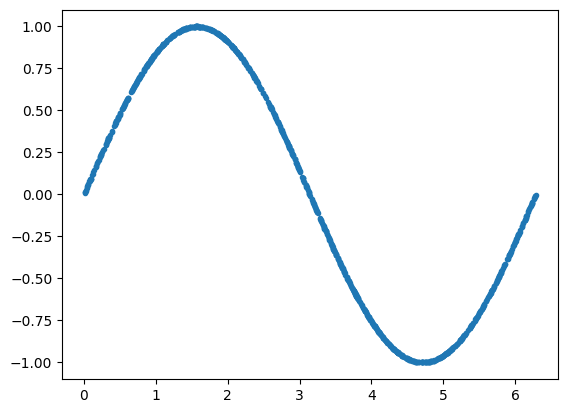

In [4]:
# Visualizing the data

plt.plot(train_data[:,0],train_data[:,1],".")

# plt.plot(train_data[:,0],train_data[:,1],".",c='green')
# plt.plot(train_data[:,0],train_data[:,1],"_",c='orange')


In [5]:
# Creating data loader for batch_wise training

batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size)
train_loader


In [15]:
# Building Discriminator

class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2,256),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(64,1),
        nn.Sigmoid(),
        )
  def forward(self,x):
    output = self.model(x)
    return output


In [12]:
# Building Generator

class Generator(nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,32),
        nn.ReLU(),
        nn.Linear(32,2),
    )
  def forward(self,x):
    output = self.model(x)
    return output


In [16]:
# Creating Objects for Both Classes

discriminator = Discriminator()
generator = Generator()


In [9]:
# Setting Parameters for training

lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()


In [10]:
# Setting Optimizers

optimizer_d = torch.optim.Adam(discriminator.parameters(),lr=lr)
optimizer_g = torch.optim.Adam(generator.parameters(),lr=lr)


In [19]:
# Training GAN

for epoch in range(num_epochs):
  for n,(real_samples,_) in enumerate(train_loader):
    real_samples_labels = torch.ones((batch_size,1))
    latent_space_samples = torch.randn((batch_size,2))
    generated_samples = generator(latent_space_samples)
    generated_samples_labels = torch.zeros((batch_size,1))
    all_samples = torch.cat((real_samples, generated_samples))
    all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

    # Training Discriminator

    discriminator.zero_grad()
    output_discriminator = discriminator(all_samples)
    loss_discriminator = loss_function(output_discriminator, all_samples_labels)
    loss_discriminator.backward()
    optimizer_d.step()

    # Generate random noise for training generator

    latent_space_samples = torch.randn((batch_size,2))

    # Training generator

    generator.zero_grad()
    generator_samples = generator(latent_space_samples)
    output_discriminator_generated = discriminator(generated_samples)
    loss_generator = loss_function(output_discriminator_generated,real_samples_labels)
    #loss_generator.backward()
    loss_generator.backward(retain_graph=True)
    optimizer_g.step()


RuntimeError: ignored

In [ ]:
# Generating Fake Data & Visualizing

    latent_space_samples = torch.randn(100,2)
    generated_samples = generator(latent_space_samples)
    generated_samples = generated_samples.detach()
    plt.plot(generated_samples[:,0],
             generated_samples[:,1],
             ".")

In [ ]:
# Training GAN

for epoch in range(num_epochs):
  for n, (real_samples,_) in enumerate(train_loader):
    real_samples_labels = torch.ones((batch_size, 1))
    latent_space_samples = torch.randn((batch_size, 2))
    generated_samples = generator(latent_space_samples)
    generated_samples_labels = torch.zeros((batch_size, 1))
    all_samples = torch.cat((real_samples, generated_samples))
    all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

# Training discriminator

    discriminator.zero_grad()
    output_discriminator = discriminator(all_samples)
    loss_discriminator = loss_function(output_discriminator, all_samples_labels)
    loss_discriminator.backward()
    optimizer_d.step()

# generator random noise for training generator

    latent_space_samples = torch.randn((batch_size, 2))

# Training generator

    generator.zero_grad()
    generated_samples = generator(latent_space_samples)
    output_discriminator_generated = discriminator(generated_samples)
    loss_generator = loss_function(output_discriminator_generated,real_samples_labels)
    loss_generator.backward()
    optimizer_g.step()







    # Generating fake data & visualising

latent_space_samples = torch.randn(100,2)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:,0],generated_samples[:,1],"_")